# Python Programming - Final Project
## Student : Alberto Bautista

# Part 1 - Highlight trends in the dataset using some plotting library.

### Import Libraries and load dataset

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import pandas as pd
df = pd.read_csv("/Users/albertodavidbautistasanchez/Library/CloudStorage/OneDrive-Personal/Documentos/DataAnalytics/ProgrammingPython/FinalProject_ProgramingInPython/DataSetManagement/airbnb_listings.csv")
df.head()

id                          listing_url       scrape_id last_scraped  \
0   44077   https://www.airbnb.com/rooms/44077  20220911231053   2022-09-12   
1   85156   https://www.airbnb.com/rooms/85156  20220911231053   2022-09-12   
2  159889  https://www.airbnb.com/rooms/159889  20220911231053   2022-09-12   
3  162809  https://www.airbnb.com/rooms/162809  20220911231053   2022-09-11   
4  165828  https://www.airbnb.com/rooms/165828  20220911231053   2022-09-11   

        source                                          name  \
0  city scrape           cosy comfortable Irish cottage twin   
1  city scrape  Cosy Comfortable Irish Cottage  1 Double Bed   
2  city scrape                          Friendly Single Room   
3  city scrape            5.5 miles south of Dublin City :^)   
4  city scrape                Pádraig Pearse apt. Kilmainham   

                                         description  \
0  Our house was built in 1937 when there was ple...   
1  Our Cottage is a charming light filled cottage...   
2  Washing can be done at a cost of €5  per load....   
3  A nice place to relax after the bustle of the ...   
4  Don't just visit Dublin, experience Dublin in ...   

                               neighborhood_overview  \
0  I like our neighbourhood as there is no shorta...   
1  I love Dundrum and its surrounding areas ,<br ...   
2  Plenty of buses into the city and the area is ...   
3  Close to the sea, hill walks and the city - vi...   
4  Enjoy a walk along the grand canal, or just ob...   

                                         picture_url  host_id  ...  \
0  https://a0.muscache.com/pictures/525706/050a3a...   193005  ...   
1  https://a0.muscache.com/pictures/1749253/9ed2a...   193005  ...   
2  https://a0.muscache.com/pictures/3031697/a8259...   766611  ...   
3  https://a0.muscache.com/pictures/86694529/c07b...   777681  ...   
4  https://a0.muscache.com/pictures/34311419/b3f6...   790601  ...   

  review_scores_communication review_scores_location review_scores_value  \
0                        4.93                   4.66                4.82   
1                        4.88                   4.64                4.78   
2                        4.90                   4.63                4.74   
3                        4.97                   4.77                4.85   
4                        4.75                   4.34                4.55   

  license instant_bookable calculated_host_listings_count  \
0     NaN                f                              2   
1     NaN                f                              2   
2     NaN                f                              3   
3     NaN                f                              2   
4     NaN                t                              5   

  calculated_host_listings_count_entire_homes  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           5   

  calculated_host_listings_count_private_rooms  \
0                                            2   
1                                            2   
2                                            3   
3                                            2   
4                                            0   

  calculated_host_listings_count_shared_rooms reviews_per_month  
0                                           0              1.85  
1                                           0              1.53  
2                                           0              2.78  
3                                           0              3.68  
4                                           0              0.48  

[5 rows x 75 columns]

In [4]:
df.shape

(7566, 75)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   listing_url                                   7566 non-null   object 
 2   scrape_id                                     7566 non-null   int64  
 3   last_scraped                                  7566 non-null   object 
 4   source                                        7566 non-null   object 
 5   name                                          7566 non-null   object 
 6   description                                   7411 non-null   object 
 7   neighborhood_overview                         4194 non-null   object 
 8   picture_url                                   7566 non-null   object 
 9   host_id                                       7566 non-null   i

In [6]:
columnasToDelete = ["listing_url","scrape_id","last_scraped","source","picture_url","host_url","host_thumbnail_url",
                    "host_picture_url","neighbourhood_group_cleansed","bathrooms","license","calendar_updated"]
df.drop(columns=columnasToDelete, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   name                                          7566 non-null   object 
 2   description                                   7411 non-null   object 
 3   neighborhood_overview                         4194 non-null   object 
 4   host_id                                       7566 non-null   int64  
 5   host_name                                     7566 non-null   object 
 6   host_since                                    7566 non-null   object 
 7   host_location                                 6232 non-null   object 
 8   host_about                                    3556 non-null   object 
 9   host_response_time                            3932 non-null   o

### Transformation of some columns

In [7]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
df["host_response_rate"].fillna(0, inplace=True)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
df["host_acceptance_rate"].fillna(0, inplace=True)
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)

host_response_time_dic = {
    "nan" :1,
    "a few days or more" :2,
    "within a day":3,
    "within a few hours":4,
    "within an hour":5
}

df['host_response_time'] = df['host_response_time'].astype(str).replace(host_response_time_dic)

host_is_superhost_dic = {
    "t" :1,
    "f" :0    
}

df['host_is_superhost'] = df['host_is_superhost'].astype(str).replace(host_is_superhost_dic)
df['host_has_profile_pic'] = df['host_has_profile_pic'].astype(str).replace(host_is_superhost_dic)
df['host_identity_verified'] = df['host_identity_verified'].astype(str).replace(host_is_superhost_dic)
df['has_availability'] = df['has_availability'].astype(str).replace(host_is_superhost_dic)
df['instant_bookable'] = df['instant_bookable'].astype(str).replace(host_is_superhost_dic)
df['host_is_superhost']

df['description'] = df['description'].apply(lambda x: len(str(x).split()))

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   name                                          7566 non-null   object 
 2   description                                   7566 non-null   int64  
 3   neighborhood_overview                         4194 non-null   object 
 4   host_id                                       7566 non-null   int64  
 5   host_name                                     7566 non-null   object 
 6   host_since                                    7566 non-null   object 
 7   host_location                                 6232 non-null   object 
 8   host_about                                    3556 non-null   object 
 9   host_response_time                            7566 non-null   i

/var/folders/5h/fvq38v756lxc97gmqyw3df900000gn/T/ipykernel_67371/2492059870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.drop(columns="id", axis=0 ,inplace=True)
/var/folders/5h/fvq38v756lxc97gmqyw3df900000gn/T/ipykernel_67371/2492059870.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric.drop(columns="host_id", axis=0 ,inplace=True)


array([[<Axes: title={'center': 'description'}>,
        <Axes: title={'center': 'host_response_time'}>,
        <Axes: title={'center': 'host_is_superhost'}>,
        <Axes: title={'center': 'host_listings_count'}>,
        <Axes: title={'center': 'host_total_listings_count'}>,
        <Axes: title={'center': 'host_has_profile_pic'}>],
       [<Axes: title={'center': 'host_identity_verified'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'beds'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'maximum_nights'}>,
        <Axes: title={'center': 'minimum_minimum_nights'}>,
        <Axes: title={'center': 'maximum_minimum_nights'}>,
        <Axes: title={'center': 'minimum_maximum_nights'}>],
       [<Axes: title={'center': 'maximum_

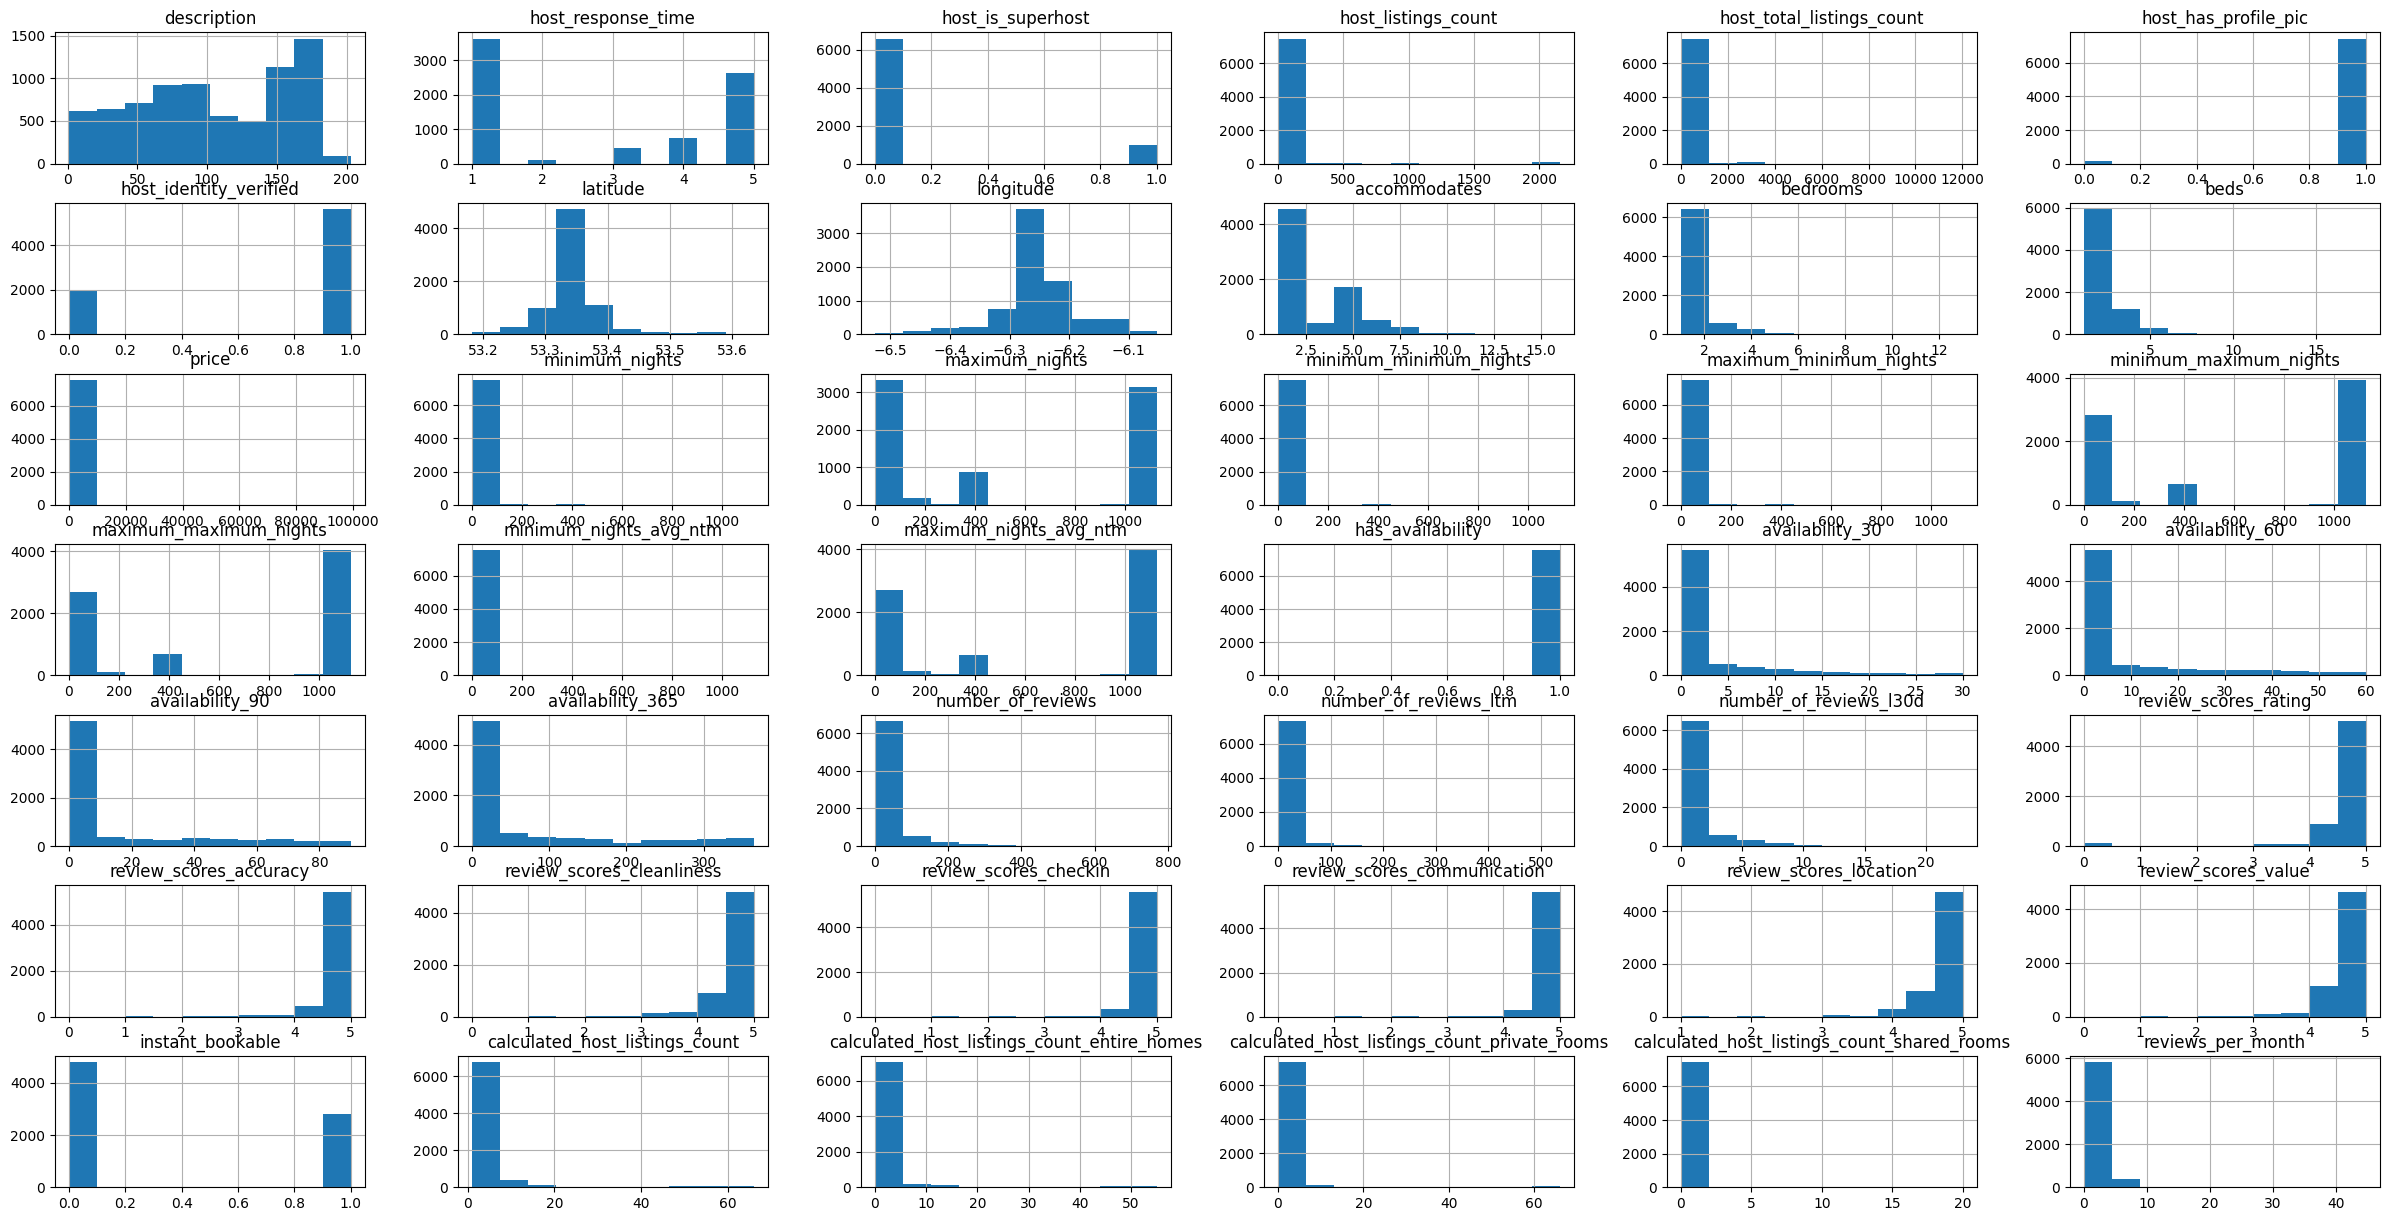

In [8]:
df_numeric = df[df.describe().columns]
df_numeric.drop(columns="id", axis=0 ,inplace=True)
df_numeric.drop(columns="host_id", axis=0 ,inplace=True)
df_numeric.hist(figsize=(30,15))



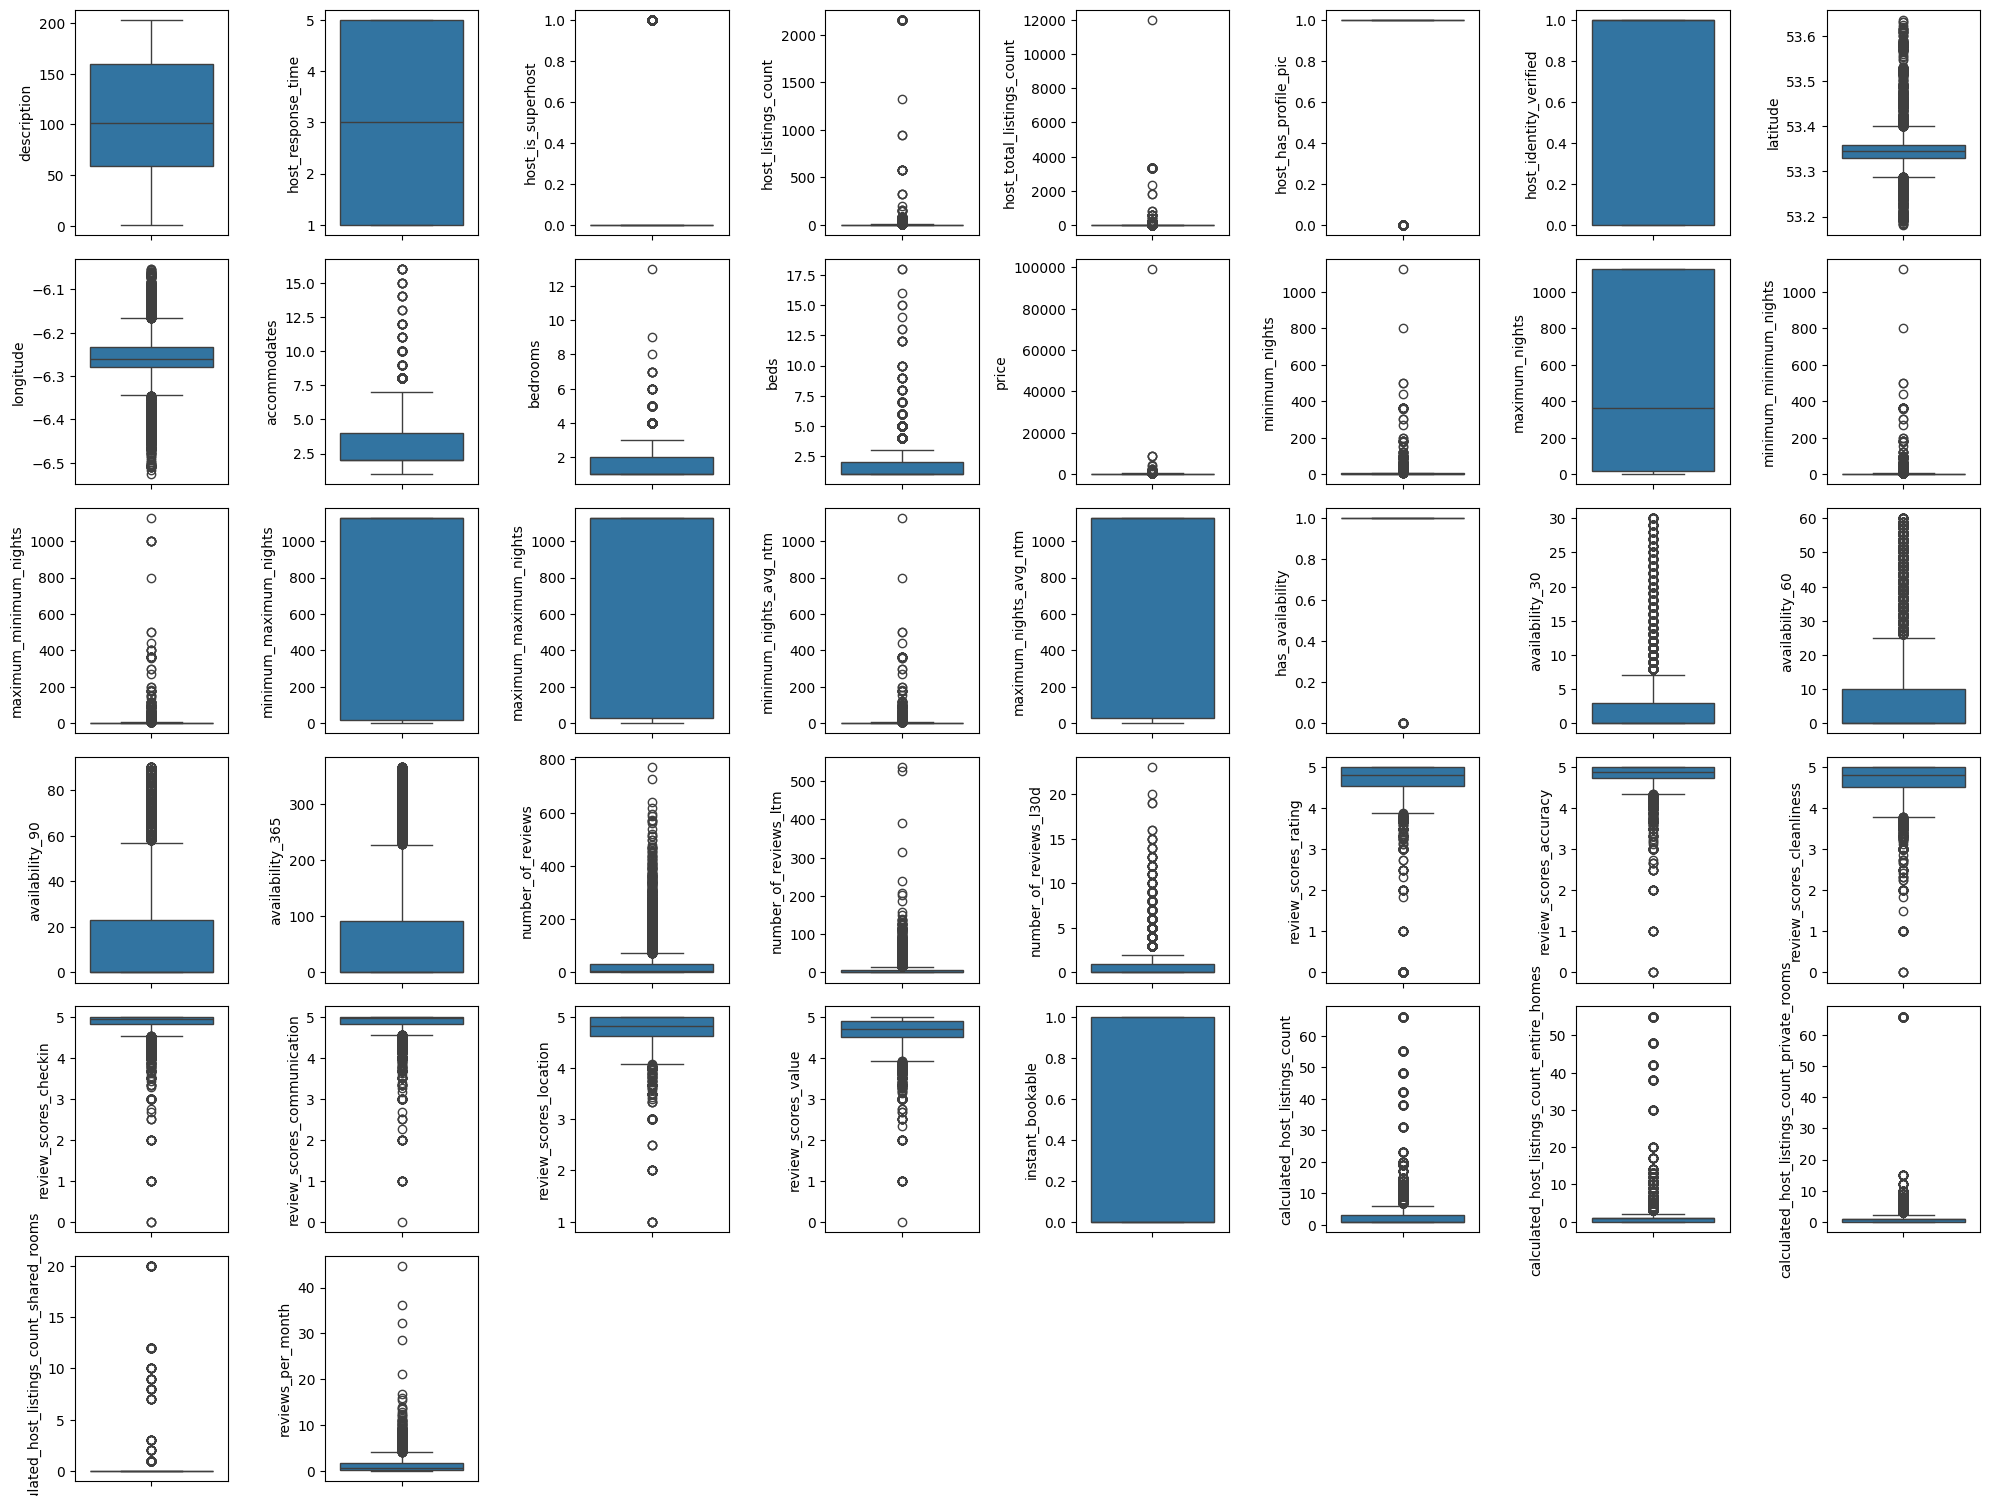

In [9]:
fig = plt.figure(figsize=(20,20))
count = 0
for variable in df_numeric.columns:
    count += 1
    plt.subplot(8, 8, count)
    ax = sns.boxplot(y=variable, data=df_numeric)
plt.tight_layout()  
plt.show()

In [10]:
df.loc[df['price']>1170, 'price'] = np.nan
df['price'].fillna(df['price'].mean(), inplace=True)

df_numeric.loc[df_numeric['price']>1170, 'price'] = np.nan
df_numeric['price'].fillna(df_numeric['price'].mean(), inplace=True)

/var/folders/5h/fvq38v756lxc97gmqyw3df900000gn/T/ipykernel_67371/3144933655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numeric['price'].fillna(df_numeric['price'].mean(), inplace=True)


In [11]:
df_numeric["price"].describe()

count    7566.000000
mean      148.679145
std       133.150795
min        10.000000
25%        65.000000
50%       105.000000
75%       185.000000
max      1133.000000
Name: price, dtype: float64

<Axes: >

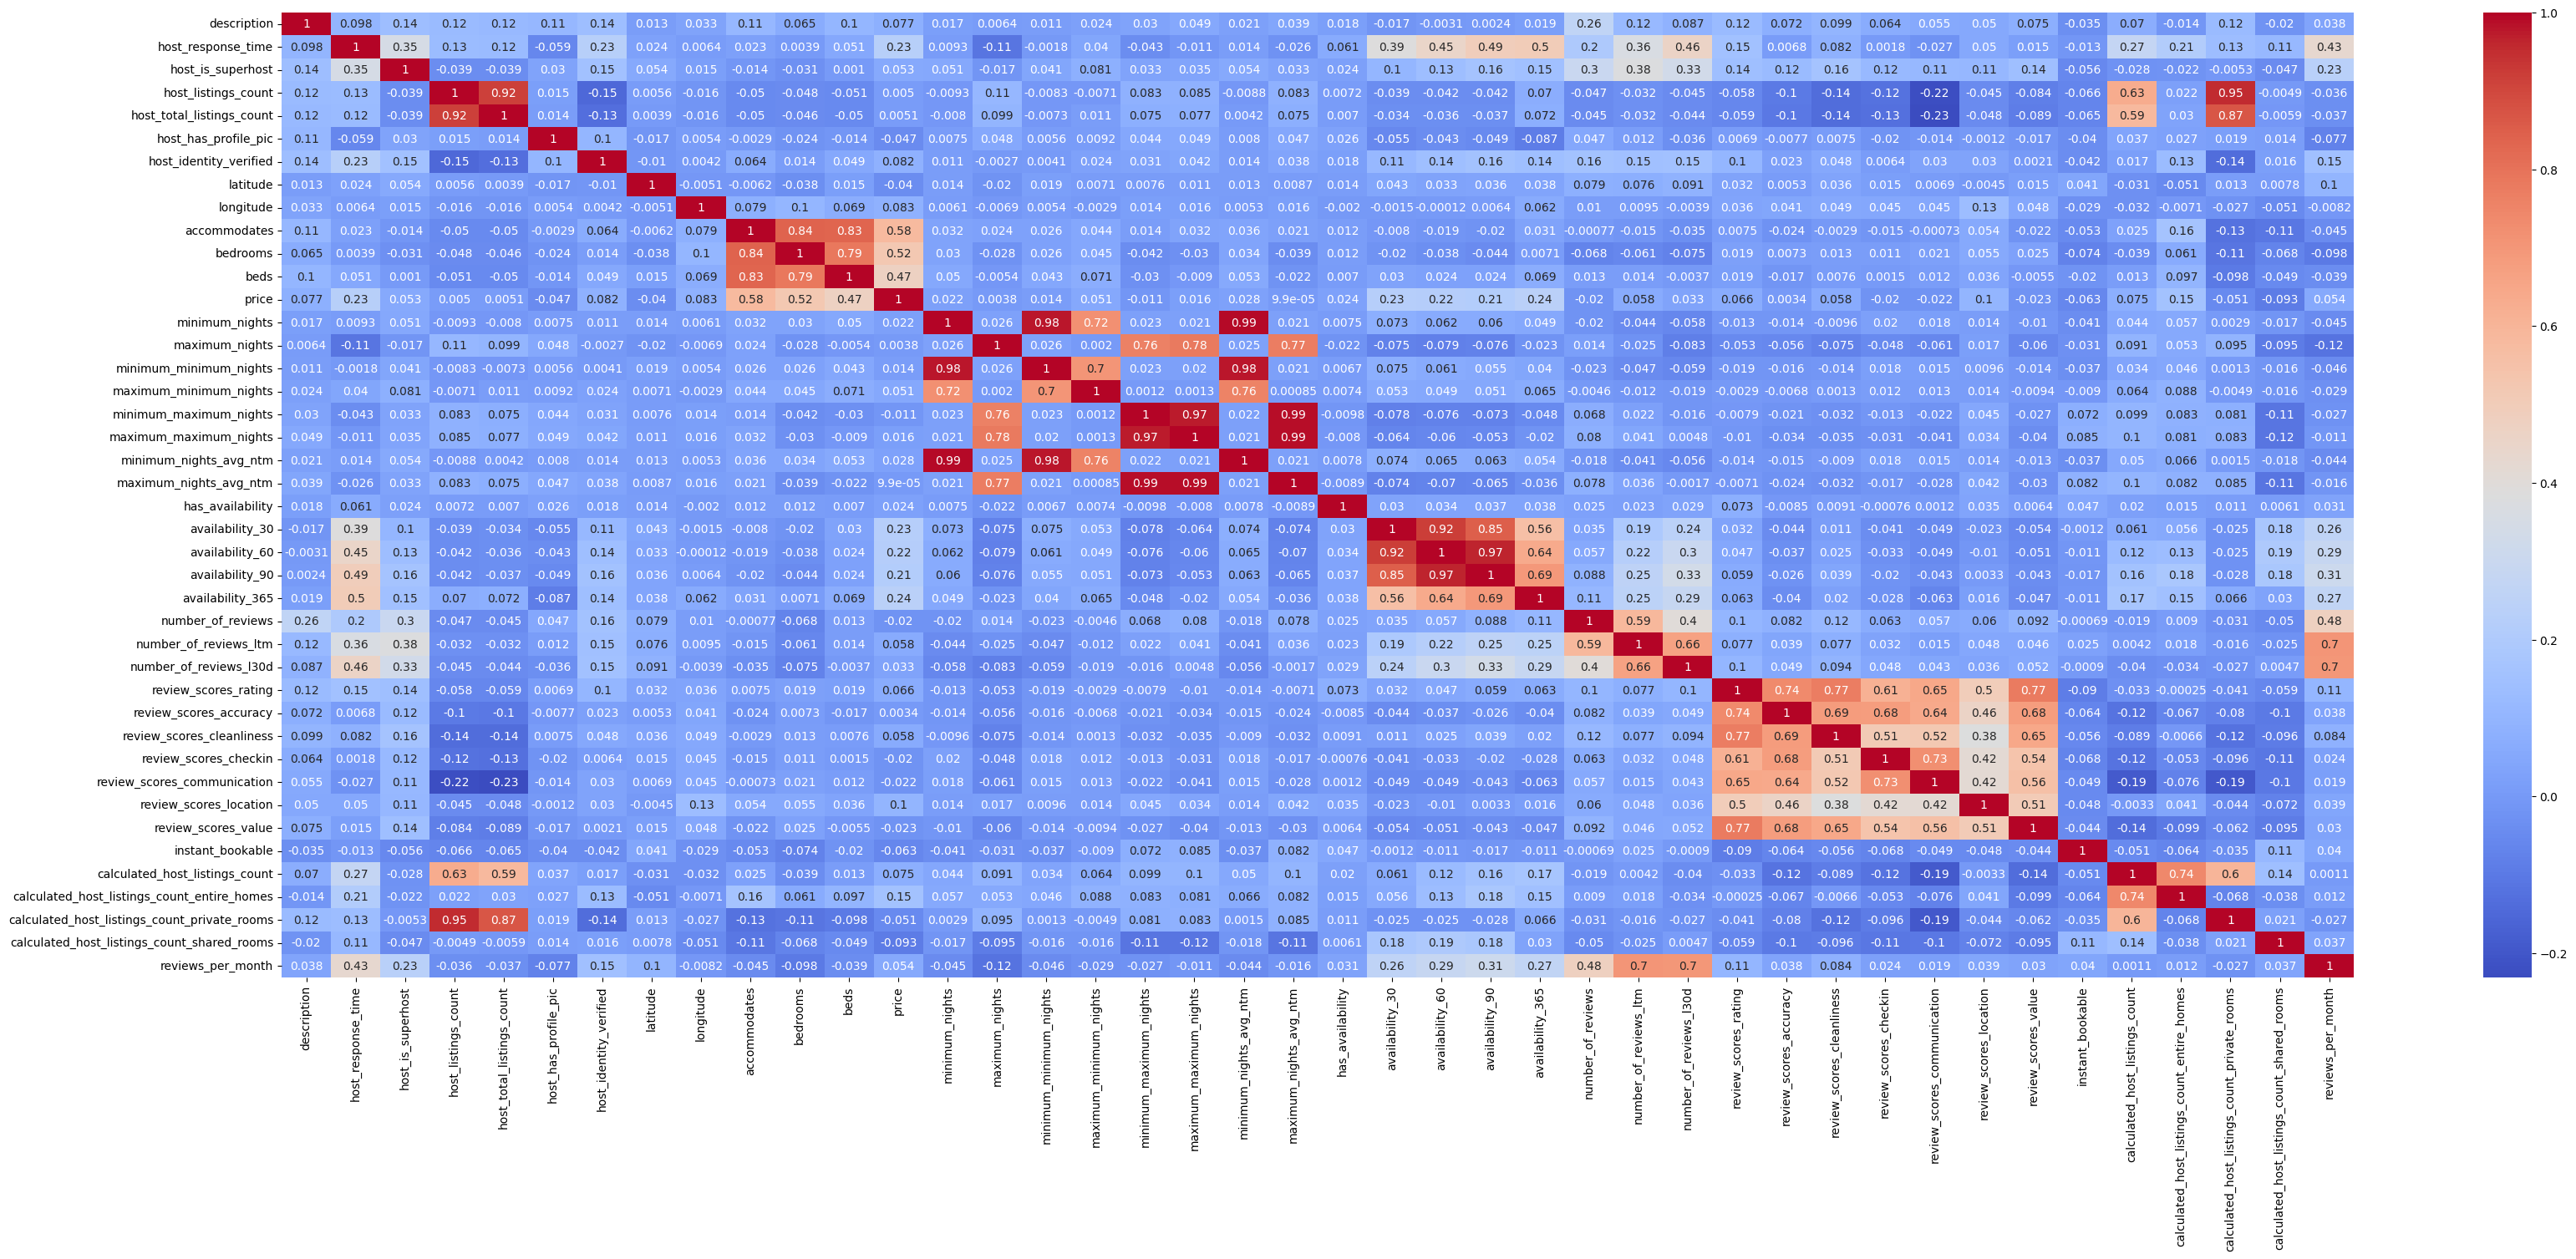

In [12]:
plt.figure(figsize=(40,15))
sns.heatmap(df_numeric.corr(),annot=True ,cmap="coolwarm")

In [13]:
def get_columns_highly_correlated(df_corr, threshold=0.5):     
    upper = df_corr.where(np.triu(np.ones(df_corr.shape), k=1).astype(bool))      
    to_drop = [column for column in upper.columns if any(abs(upper[column]) > threshold)]
    print(to_drop)    
    return to_drop

['host_total_listings_count', 'bedrooms', 'beds', 'price', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'reviews_per_month']


<Axes: >

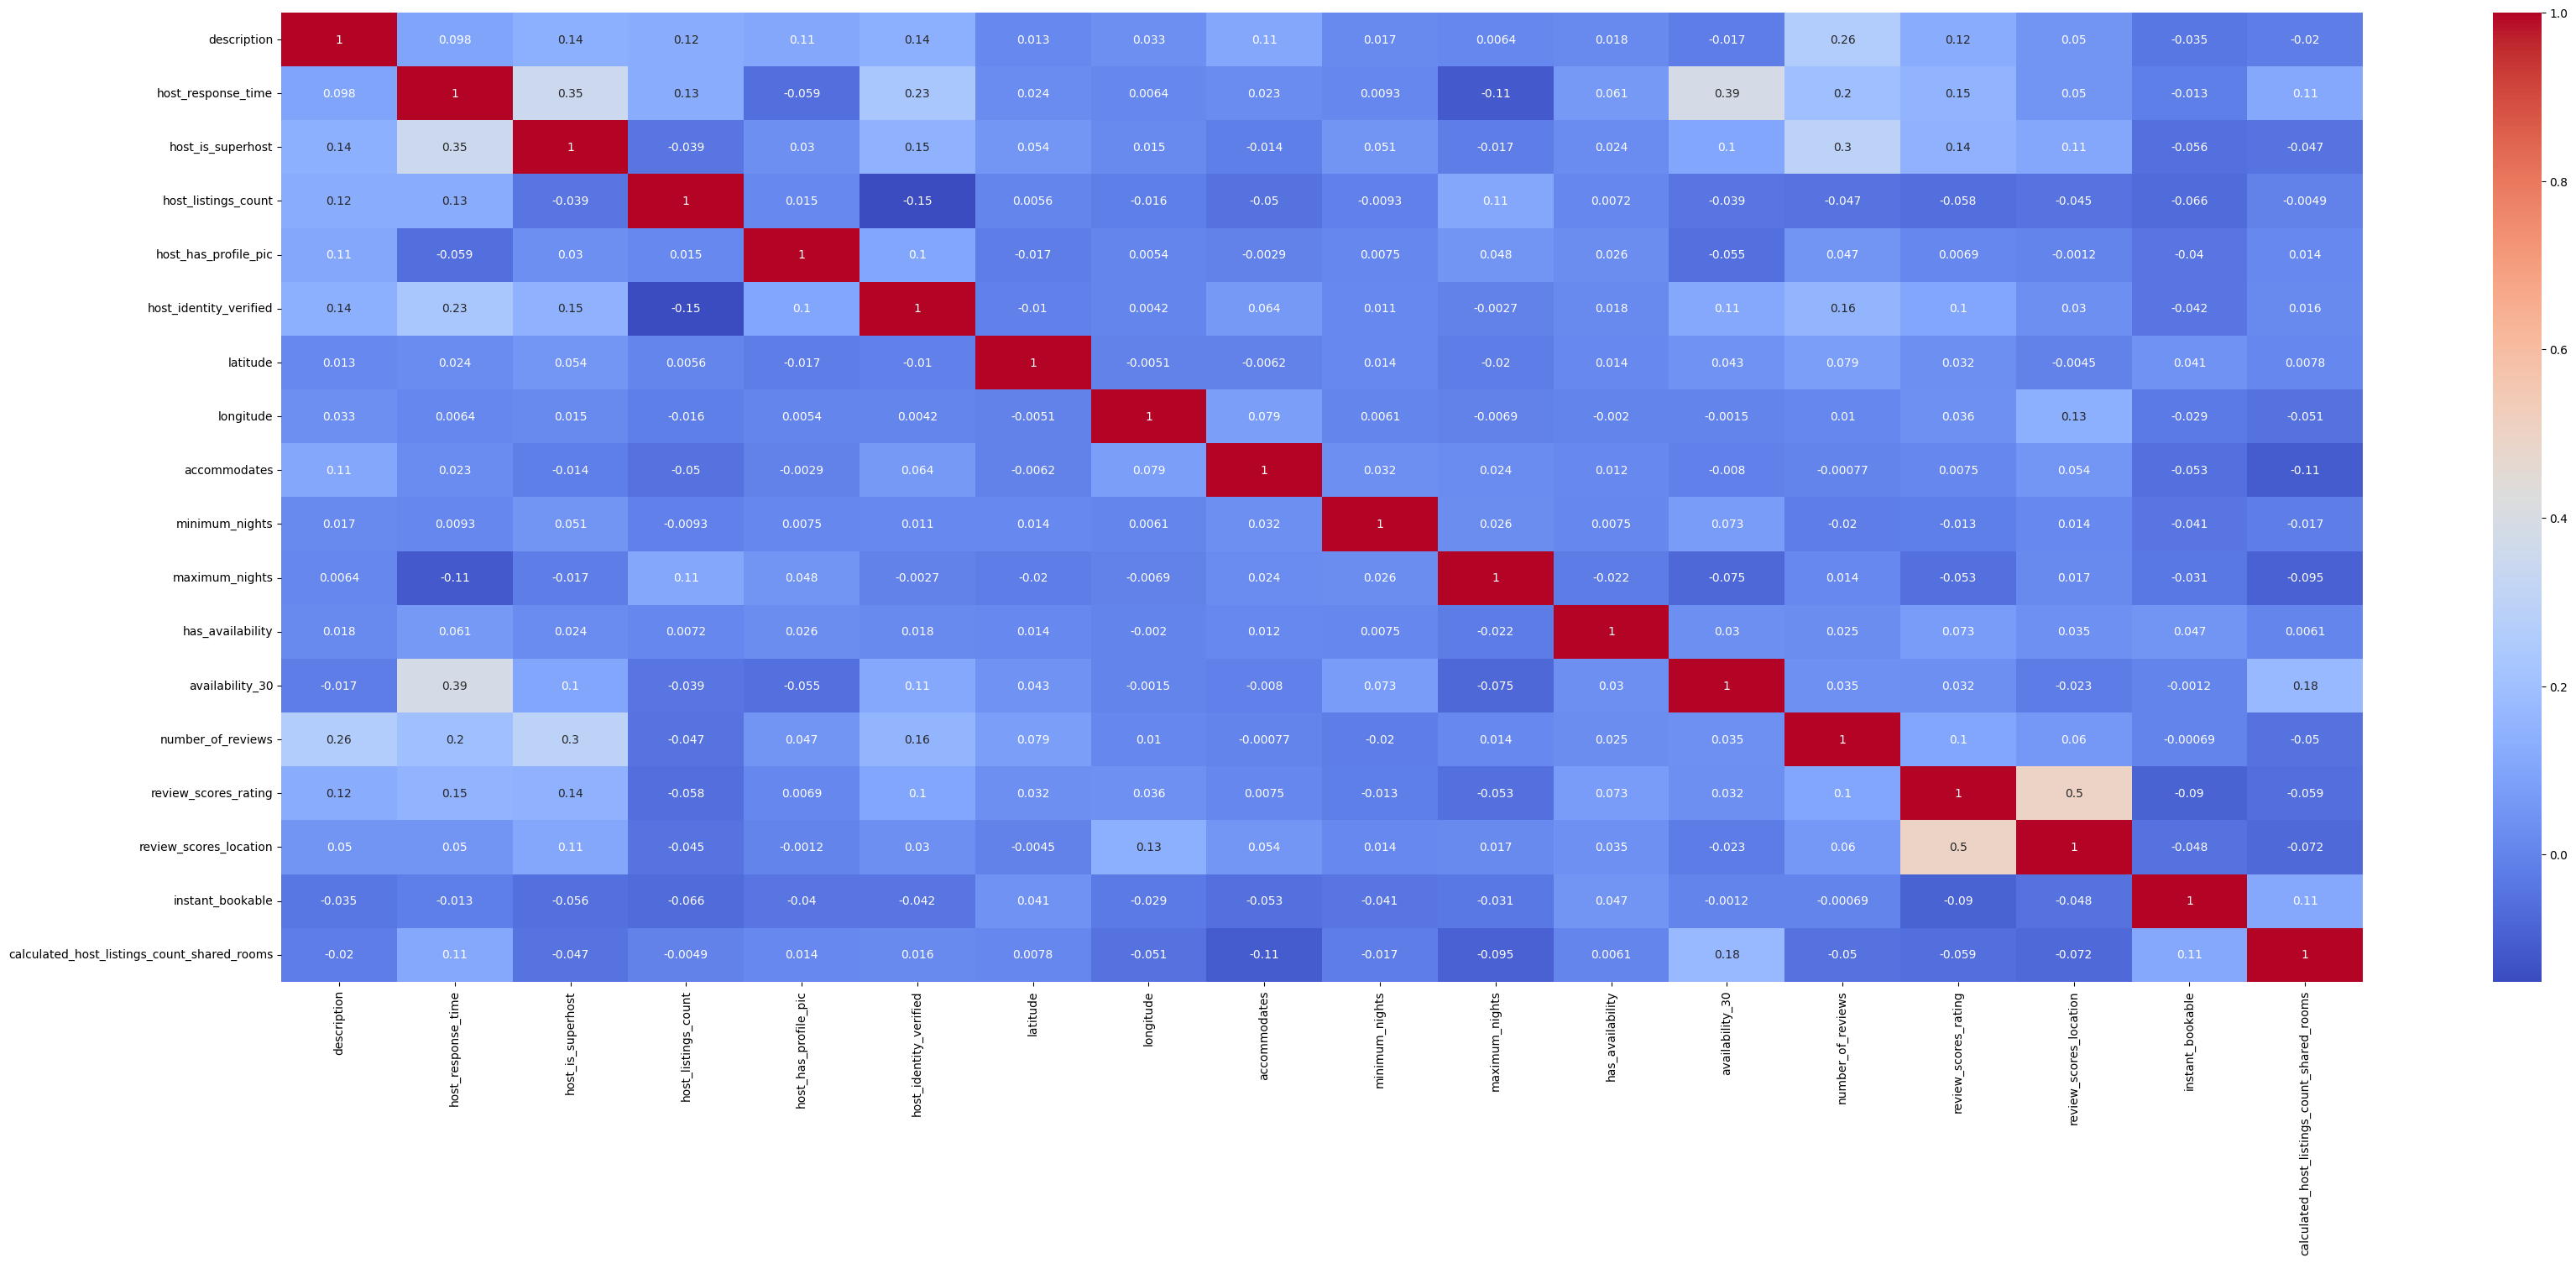

In [14]:
columnsHigh=get_columns_highly_correlated(df_numeric.corr())
filtered =df_numeric.drop(columns=columnsHigh, axis=0)
data_high_correlation = df_numeric[columnsHigh]
plt.figure(figsize=(40,15))
sns.heatmap(filtered.corr(),annot=True ,cmap="coolwarm")

In [41]:
variableOfInterest = [
    #'description',
    'host_is_superhost',
    'host_total_listings_count',
    'bedrooms',
    'beds',
    'price',
    'minimum_minimum_nights',
    # 'maximum_minimum_nights',
    # 'minimum_maximum_nights',
    # 'maximum_maximum_nights',
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm',
    'availability_60',
    'availability_90',
    'availability_365',
    'number_of_reviews_ltm',
    'number_of_reviews_l30d',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_value',
    # 'calculated_host_listings_count',
    #'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'reviews_per_month']

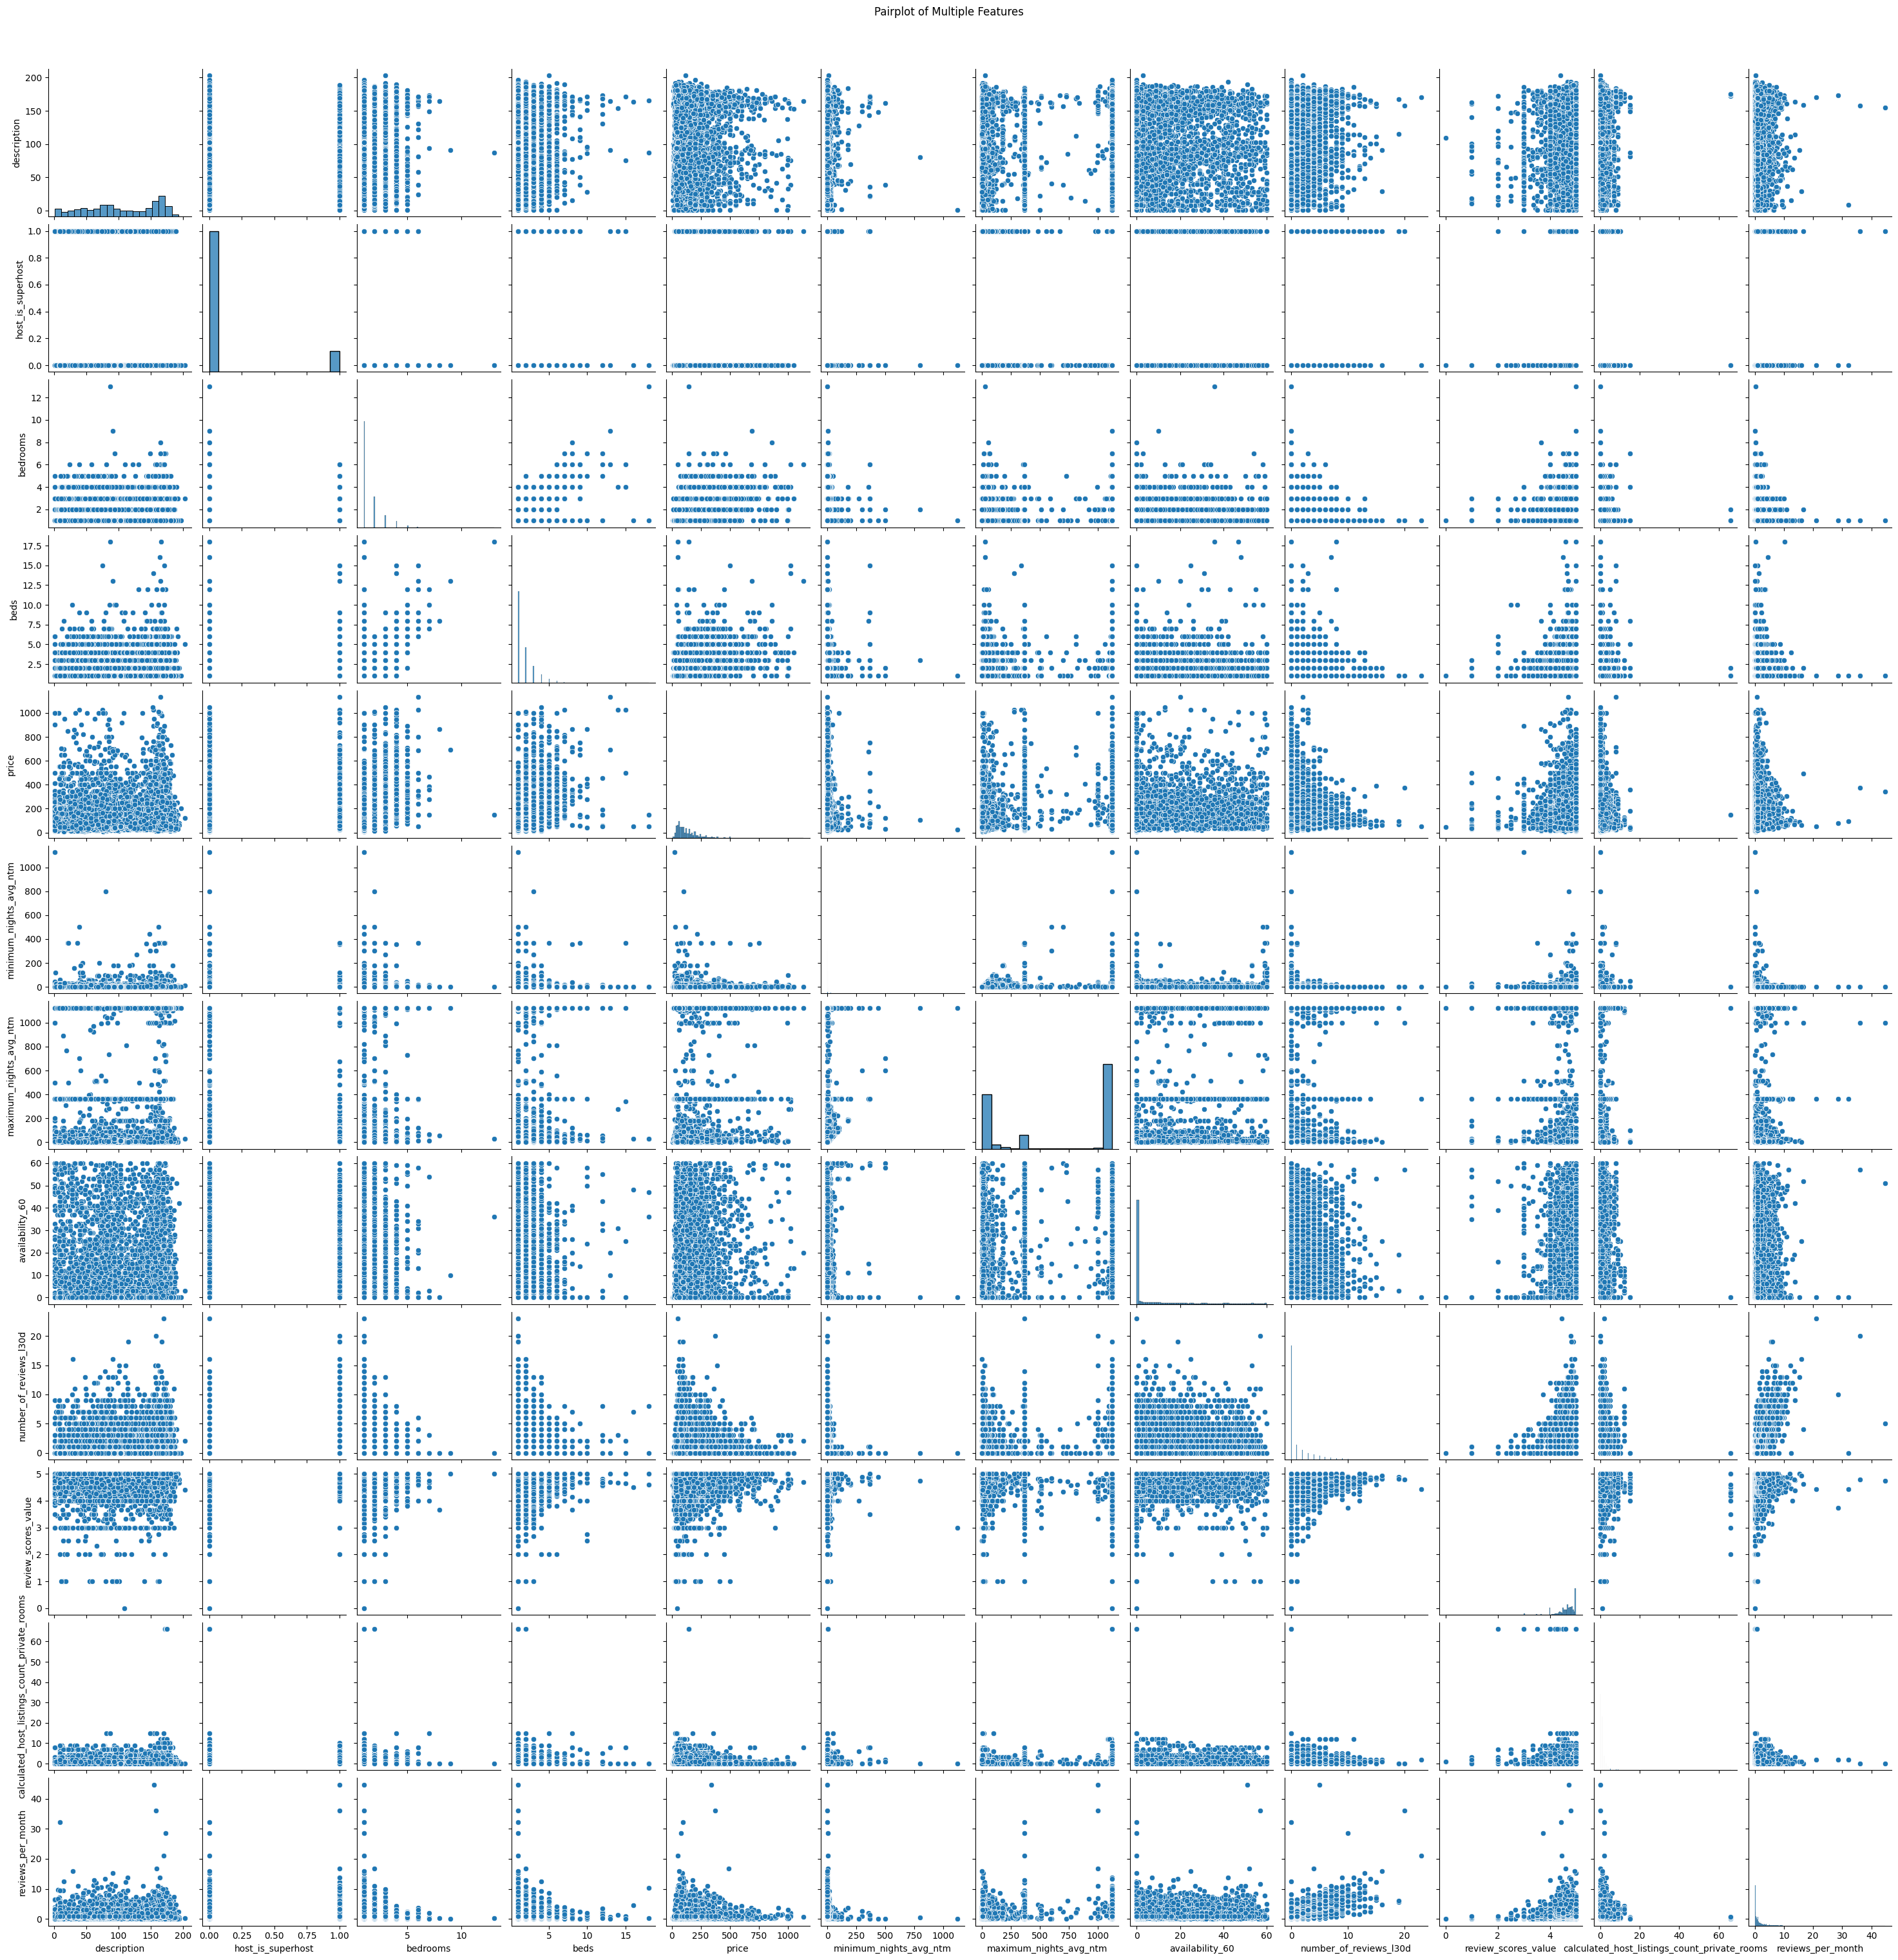

In [16]:
# Create a pairplot
sns.pairplot(df[variableOfInterest])
plt.suptitle('Pairplot of Multiple Features', y=1.02)
plt.show()

array([[<Axes: title={'center': 'description'}>,
        <Axes: title={'center': 'host_is_superhost'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights_avg_ntm'}>],
       [<Axes: title={'center': 'maximum_nights_avg_ntm'}>,
        <Axes: title={'center': 'availability_60'}>,
        <Axes: title={'center': 'number_of_reviews_l30d'}>],
       [<Axes: title={'center': 'review_scores_value'}>,
        <Axes: title={'center': 'calculated_host_listings_count_private_rooms'}>,
        <Axes: title={'center': 'reviews_per_month'}>]], dtype=object)

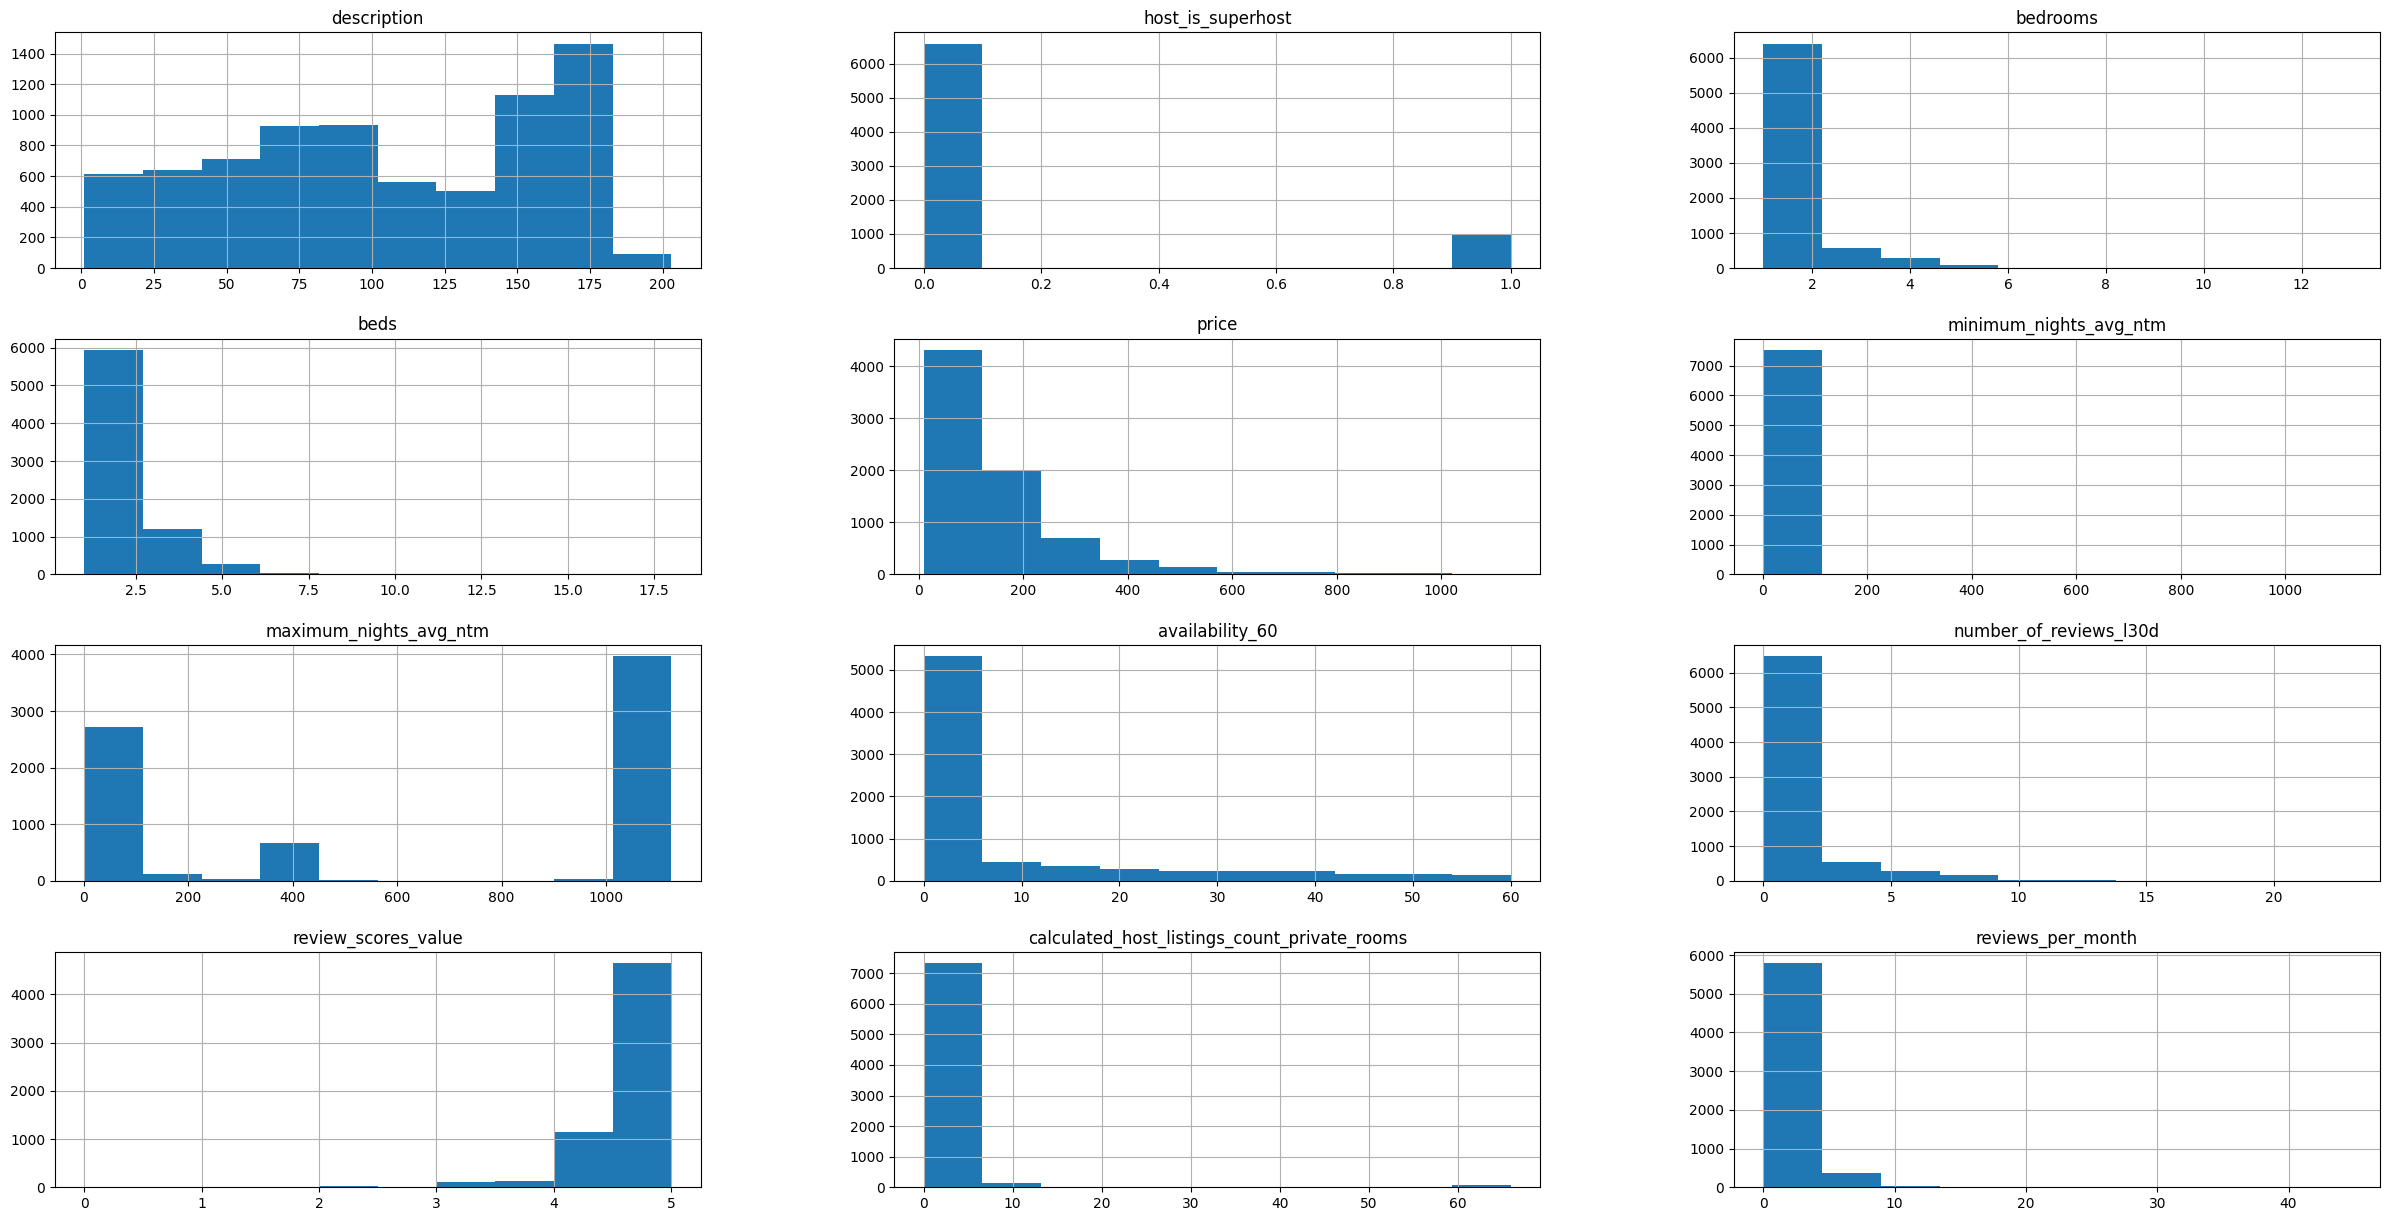

In [17]:
df[variableOfInterest].hist(figsize=(30,15))

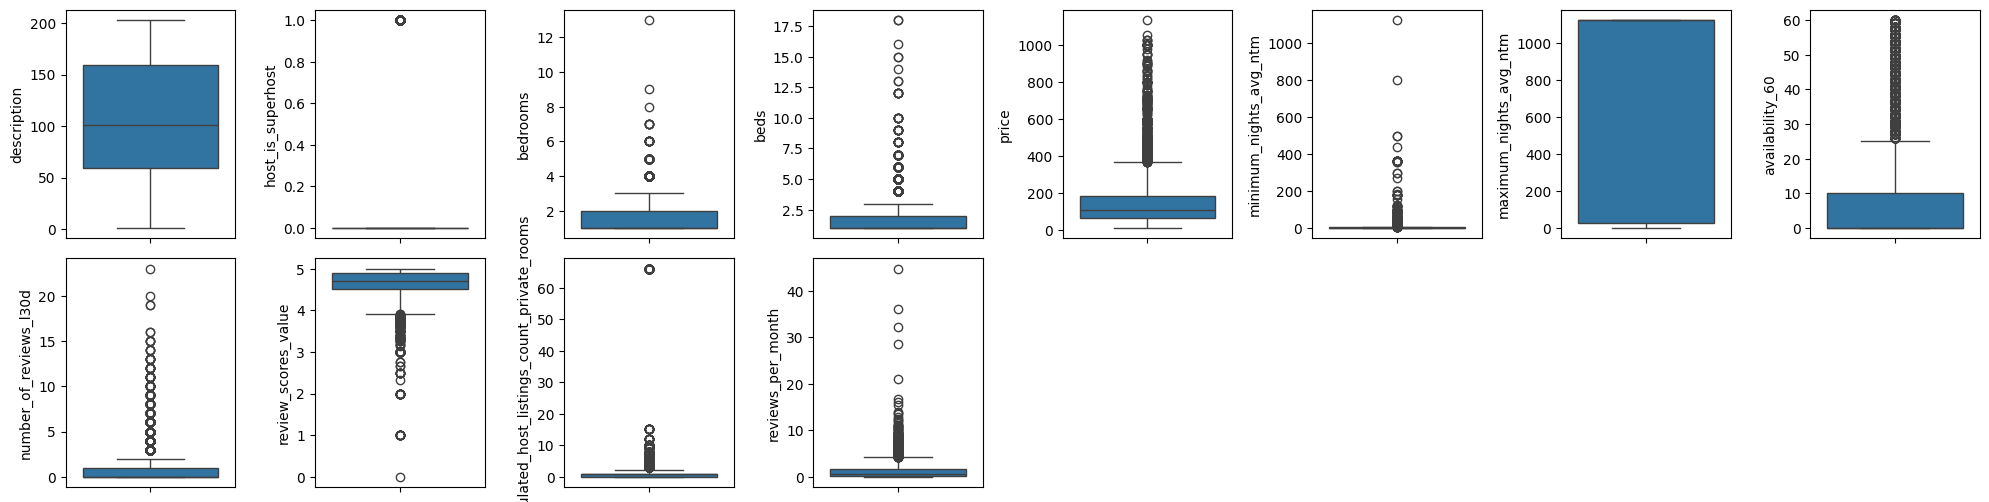

In [18]:
fig = plt.figure(figsize=(20,20))
count = 0
for variable in variableOfInterest:
    count += 1
    plt.subplot(8, 8, count)
    ax = sns.boxplot(y=variable, data=df)
plt.tight_layout()  
plt.show()

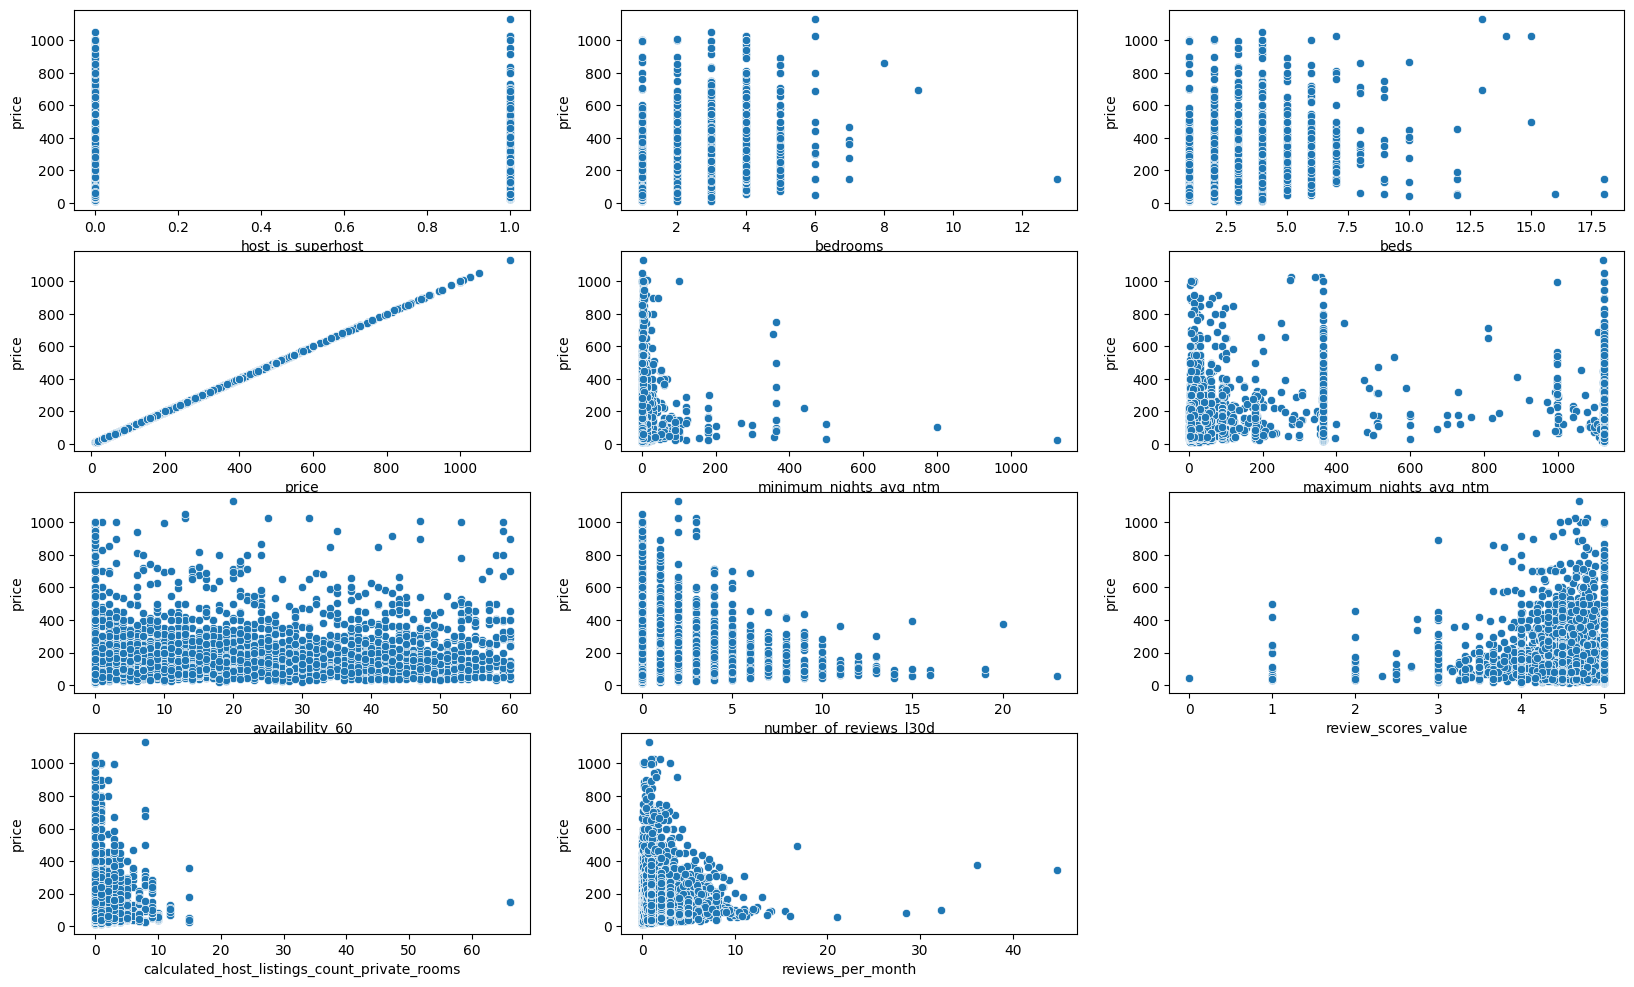

In [23]:
#Visualization of the selected variables using box plots
fig = plt.figure(figsize=(20,12))

count = 0

for variable in variableOfInterest:
    
    count += 1
    
    plt.subplot(4, 3, count)
    
    ax = sns.scatterplot(y='price',x = variable, data = df)  
    
plt.show()


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7566 entries, 0 to 7565
Data columns (total 63 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            7566 non-null   int64  
 1   name                                          7566 non-null   object 
 2   description                                   7566 non-null   int64  
 3   neighborhood_overview                         4194 non-null   object 
 4   host_id                                       7566 non-null   int64  
 5   host_name                                     7566 non-null   object 
 6   host_since                                    7566 non-null   object 
 7   host_location                                 6232 non-null   object 
 8   host_about                                    3556 non-null   object 
 9   host_response_time                            7566 non-null   i

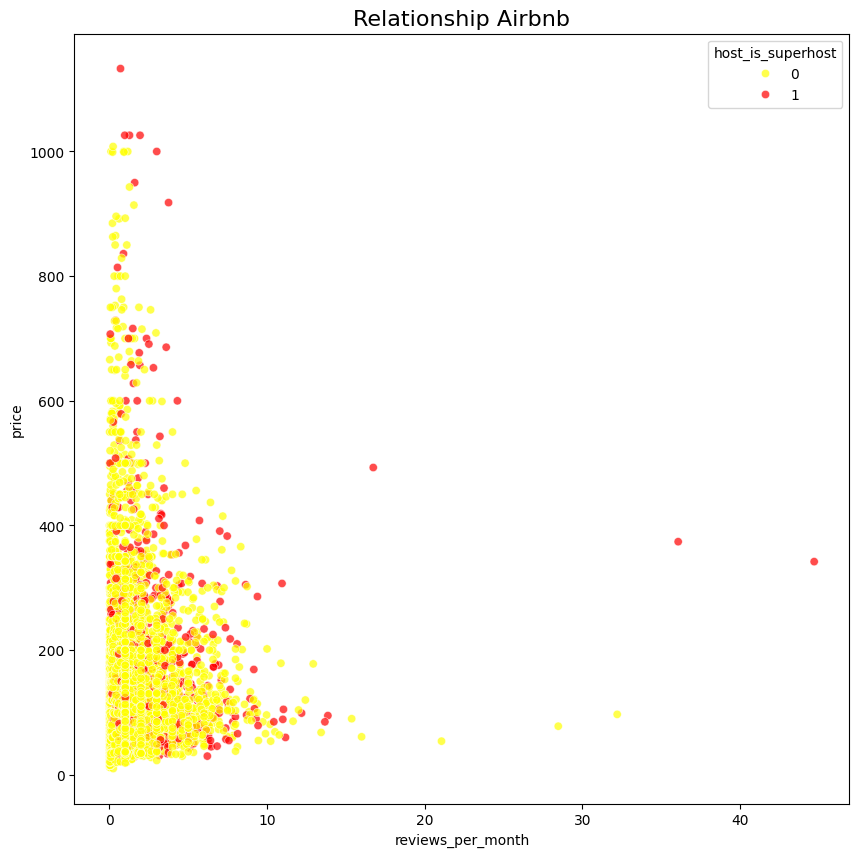

In [71]:
MyPalette = {0: 'yellow', 1: 'red'}
plt.figure(figsize=(10, 10))
sns.scatterplot(x='reviews_per_month', y='price', hue='host_is_superhost', data=df, palette=MyPalette, alpha=0.7)
plt.title('Relationship Airbnb', fontsize=16)
plt.show()